In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [6]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # # Running in Google Colab
    # !mkdir data
    # !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    url = "https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv"
    # price = pd.read_csv('data/price.csv')
    price = pd.read_csv(url)

In [7]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


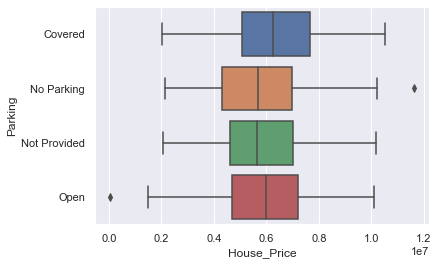

In [8]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

#### 1

In [15]:
# show Q1 Q3 and Interquartile from house price

Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 ={}, Q3 ={}, IQR ={}".format(Q1, Q3, IQR))

# show lower outliers
print('\nLower Outliers')
outliers_bawah = (price2['House_Price'] < (Q1 - 1.5 * IQR))
rumah_potensial = price2.loc[outliers_bawah]
display(rumah_potensial)

# show upper outliers
print('\nUpper Outliers')
outliers_atas = (price2['House_Price'] > (Q3 + 1.5 * IQR))
rumah_overprice = price2.loc[outliers_atas]
display(rumah_overprice)

Q1 =4658000.0, Q3 =7180500.0, IQR =2522500.0

Lower Outliers


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000



Upper Outliers


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


### 2

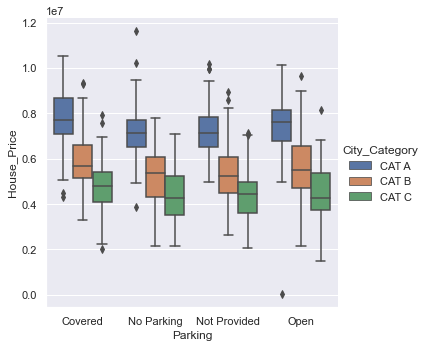

In [16]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

#### Subsetting data price2 based on "City_Category"

In [17]:
CAT_A = price2.loc[price2['City_Category'] == 'CAT A']
CAT_B = price2.loc[price2['City_Category'] == 'CAT B']
CAT_C = price2.loc[price2['City_Category'] == 'CAT C']

In [18]:
CAT_A.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
6,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
10,4278.0,10646.0,8243.0,1187.0,1439.0,Covered,CAT A,1090,7128000
15,9648.0,14789.0,12812.0,1644.0,1950.0,Covered,CAT A,790,7887000
16,11079.0,13102.0,13076.0,1578.0,1907.0,Open,CAT A,1440,7725000


In [19]:
CAT_B.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000


In [20]:
CAT_C.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
7,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
9,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000
20,8155.0,8085.0,9837.0,1940.0,2340.0,Covered,CAT C,980,4019000
21,9669.0,12385.0,13589.0,1421.0,1700.0,No Parking,CAT C,370,4346000
26,6615.0,8178.0,12804.0,1732.0,2073.0,Not Provided,CAT C,820,7005000


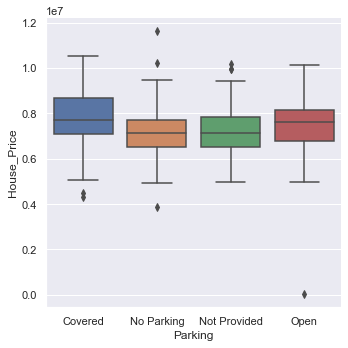

In [21]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_A)

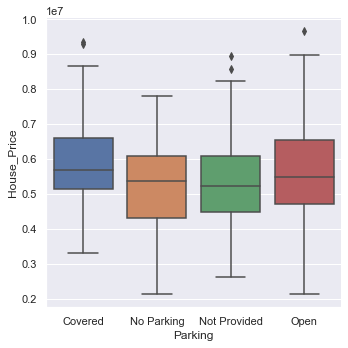

In [22]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_B)

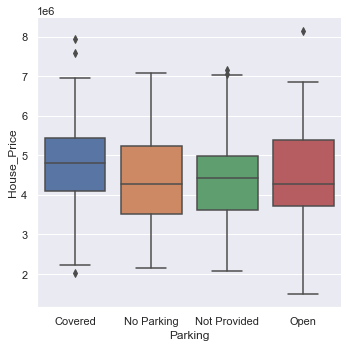

In [23]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_C)

In [24]:
# Show Q1 Q3 and Interquartile (IQR) in CAT A
Q1_A = CAT_A['House_Price'].quantile(0.25)
Q3_A = CAT_A['House_Price'].quantile(0.75)
IQR_A = Q3_A - Q1_A
print("Q1_A ={}, Q3_A ={}, IQR_A ={}".format(Q1_A, Q3_A, IQR_A))

#Lower Outliers CAT A
outliers_bawah_A = (CAT_A['House_Price'] < (Q1_A - 1.5 * IQR_A))
rumah_potensial_A = CAT_A.loc[outliers_bawah_A]
display(rumah_potensial_A)

#Upper Outliers CAT A
outliers_atas_A = (CAT_A['House_Price'] > (Q3_A + 1.5 * IQR_A))
rumah_overprice_A = CAT_A.loc[outliers_atas_A]
display(rumah_overprice_A)

Q1_A =6600000.0, Q3_A =8184000.0, IQR_A =1584000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


In [25]:
# Show Q1 Q3 and Interquartile (IQR) in CAT B
Q1_B = CAT_B['House_Price'].quantile(0.25)
Q3_B = CAT_B['House_Price'].quantile(0.75)
IQR_B = Q3_B - Q1_B
print("Q1_B ={}, Q3_B ={}, IQR_B ={}".format(Q1_B, Q3_B, IQR_B))

#Lower Outliers CAT B
outliers_bawah_B = (CAT_B['House_Price'] < (Q1_B - 1.5 * IQR_B))
rumah_potensial_B = CAT_B.loc[outliers_bawah_B]
display(rumah_potensial_B)

#Upper Outliers CAT B
outliers_atas_B = (CAT_B['House_Price'] > (Q3_B + 1.5 * IQR_B))
rumah_overprice_B = CAT_B.loc[outliers_atas_B]
display(rumah_overprice_B)

Q1_B =4617750.0, Q3_B =6378500.0, IQR_B =1760750.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
725,10989.0,13153.0,13797.0,1645.0,1958.0,Covered,CAT B,530,9336000
763,8274.0,11673.0,13345.0,1641.0,1999.0,Covered,CAT B,950,9300000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [26]:
# Show Q1 Q3 and Interquartile (IQR) in CAT C
Q1_C = CAT_C['House_Price'].quantile(0.25)
Q3_C = CAT_C['House_Price'].quantile(0.75)
IQR_C = Q3_C - Q1_C
print("Q1_C ={}, Q3_C ={}, IQR_C ={}".format(Q1_C, Q3_C, IQR_C))

#Lower Outliers CAT C
outliers_bawah_C = (CAT_C['House_Price'] < (Q1_C - 1.5 * IQR_C))
rumah_potensial_C = CAT_C.loc[outliers_bawah_C]
display(rumah_potensial_C)

#Upper Outliers CAT C
outliers_atas_C = (CAT_C['House_Price'] > (Q3_C + 1.5 * IQR_C))
rumah_overprice_C = CAT_C.loc[outliers_atas_C]
display(rumah_overprice_C)

Q1_C =3642500.0, Q3_C =5244500.0, IQR_C =1602000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
346,9119.0,11639.0,14374.0,1633.0,1968.0,Open,CAT C,330,8147000
847,8740.0,10899.0,13447.0,1873.0,2252.0,Covered,CAT C,330,7931000
